In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")


# Read the CSV file without specifying header
arima_1 = pd.read_csv("kan.csv", header=None, parse_dates=[2])

# Specify column names
arima_1.columns = ['HCHO reading','Location','Current Date','Next Date']
	

# Fill missing values using forward fill and backward fill
arima_1.fillna(method='ffill', inplace=True)
arima_1.fillna(method='bfill', inplace=True)

# Set the "Current Date" column as the index
arima_1.set_index('Current Date', inplace=True)
# Check the data type of the index
print(arima_1.index.dtype)

# Ensure "Current Date" is in datetime format
if arima_1.index.dtype != 'datetime64[ns]':
    arima_1.index = pd.to_datetime(arima_1.index, format='%d/%m/%Y')

# Check the data type of the index again
print(arima_1.index.dtype)


object
datetime64[ns]


<Axes: xlabel='Current Date'>

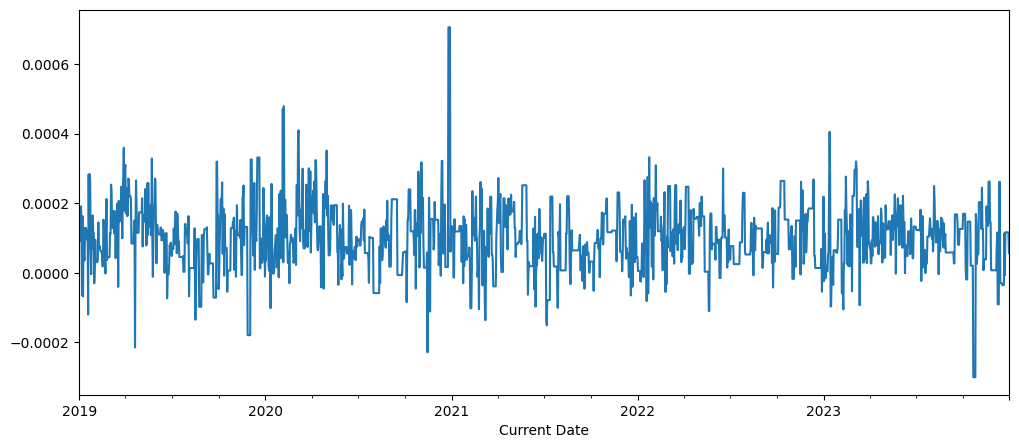

In [3]:
arima_1["HCHO reading"].plot(figsize=(12,5))

In [4]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    arimatest = adfuller(dataset, autolag='AIC')
    print("1. ADF : ",arimatest[0])
    print("2. P-value: ", arimatest[1])
    print("3. Num of lags: ", arimatest[2])
    print("4. Num Of Observations Used For ADF Regression: ",arimatest[3])
    print("5. Critical Values :")
    for key, val in arimatest[4].items():
         print("\t",key, ": ", val)

In [30]:
ad_test(arima_1['HCHO reading'])

1. ADF :  -7.450411993571995
2. P-value:  5.6902482626980916e-11
3. Num of lags:  20
4. Num Of Observations Used For ADF Regression:  1805
5. Critical Values :
	 1% :  -3.433978046594855
	 5% :  -2.8631425806072164
	 10% :  -2.567623161347749


In [31]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(arima_1['HCHO reading'], trace=True,                     
suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-29356.285, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-28641.479, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-29359.274, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-29124.182, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-27281.520, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-29373.898, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-29373.414, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-29369.579, Time=1.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-29371.919, Time=0.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-29367.407, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-29194.600, Time=0.44 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 6.382 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(2, 0, 0)   Log Likelihood               14690.949
Date:                Fri, 19 Apr 2024   AIC                         -29373.898
Time:                        13:41:05   BIC                         -29351.858
Sample:                    01-01-2019   HQIC                        -29365.768
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.874e-05   1.83e-06     21.117      0.000    3.51e-05    4.23e-05
ar.L1          0.5167   2.15e-10    2.4e+09      0.000       0.517       0.517
ar.L2          0.0952   2.09e-10   4.56e+08      0.000       0.095       0.095
sigma2      6.018e-09    1.1e-10     54.787      0.000     5.8e-09    6.23e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2411.92
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+24. Standard errors may be unstable.
"""

In [32]:
from statsmodels.tsa.arima_model import ARIMA

print(arima_1.shape)
train= arima_1.iloc[:-30]
test= arima_1.iloc[-30:]
print(train.shape,test.shape)

(1826, 3)
(1796, 3) (30, 3)


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Create ARIMA model
model = ARIMA(train['HCHO reading'], order=(2, 0, 0))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1796
Model:                 ARIMA(2, 0, 0)   Log Likelihood               14455.403
Date:                Fri, 19 Apr 2024   AIC                         -28902.806
Time:                        13:41:08   BIC                         -28880.833
Sample:                    01-01-2019   HQIC                        -28894.694
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   4.78e-06     21.123      0.000    9.15e-05       0.000
ar.L1          0.5142   2.19e-10   2.35e+09      0.000       0.514       0.514
ar.L2          0.1001   1.77e-10   5.66e+08      0.0

In [ ]:
start = len(train)
end = len(train)+len(test)-1
# Predict using the ARIMA model
pred = model_fit.predict(start=start, end=end, typ="levels")

print(pred)

pred.index=arima_1.index[start:end+1]
print(pred)

<Axes: xlabel='Current Date'>

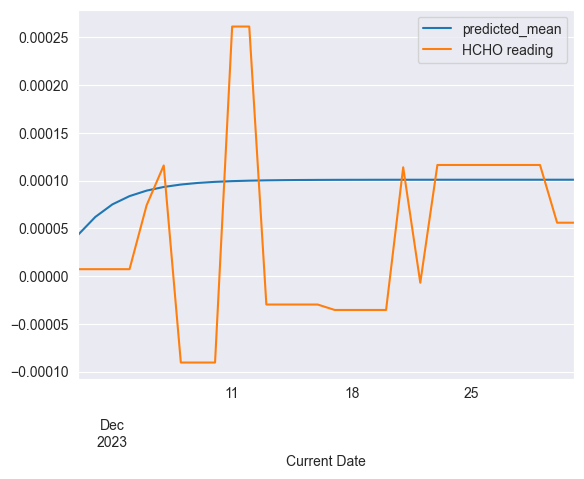

In [35]:
pred.plot(legend=True)
test['HCHO reading'].plot(legend=True)

In [36]:
test['HCHO reading'].mean()

4.142533333333334e-05

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['HCHO reading'].mean()
rmse=sqrt(mean_squared_error(pred,test['HCHO reading']))
print(rmse)

0.00010533673880369287


In [38]:
model2= ARIMA(arima_1['HCHO reading'], order=(2, 0, 0))
model2=model2.fit()
arima_1.tail()

,HCHO reading,Location,Next Date
Current Date,,,
2023-12-27,0.000116,Kandy Proper,28/12/2023
2023-12-28,0.000116,Kandy Proper,29/12/2023
2023-12-29,0.000116,Kandy Proper,30/12/2023
2023-12-30,0.000056,Kandy Proper,31/12/2023
2023-12-31,0.000056,Kandy Proper,01/01/2024


# Prediciting future values

In [39]:
future_dates= pd.date_range(start='2023-12-31', end='2024-01-30')
print(future_dates)

pred = model2.predict(start=len(arima_1),end=len(arima_1)+30, type='levels').rename('Arima Predictions')

pred.index=future_dates
print(pred)


DatetimeIndex(['2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-28', '2024-01-29', '2024-01-30'],
              dtype='datetime64[ns]', freq='D')
2023-12-31    0.000073
2024-01-01    0.000082
2024-01-02    0.000088
2024-01-03    0.000092
2024-01-04    0.000095
2024-01-05    0.000096
2024-01-06    0.000098
2024-01-07    0.000098
2024-01-08    0.000099
2024-01-09    0.000099
2024-01-10    0.000099
2024-01-11    0.000100
2024-01-12    0.000100
2024-01-13    0.000100
2024-01-14    0.000100
2024-01-15    0.000100
2024-01-16    0.000100
2024-0

<Axes: >

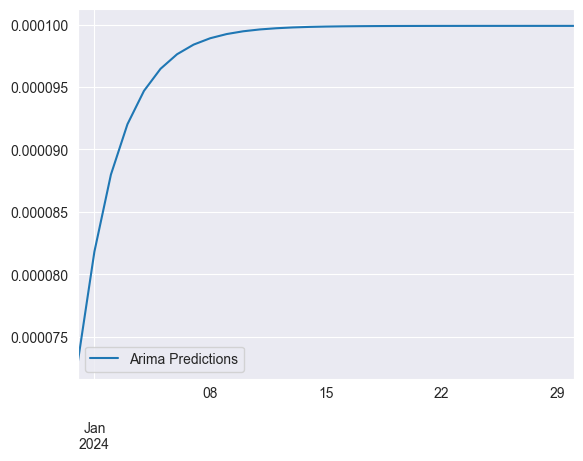

In [40]:
pred.plot(legend=True)